# Attempt 1: 

Will individually perform exploratory data analysis and check against dataset creator's Data Profiling article.

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

beers_df = pd.read_csv('/Users/abeygailpanganiban/Desktop/practice/beers.csv', index_col=0)
breweries_df = pd.read_csv('/Users/abeygailpanganiban/Desktop/practice/breweries.csv')

In [60]:
beers_df

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


This dataset contains a list of 2,410 US craft beers and 510 US breweries. The beers and breweries are linked together by the "id". 

Each beer contains...

categorical variables
* Name
* Style
* assigned unique IDs, Brewery IDs, and 

numeric values:
* ABV - The alcoholic content by volume with 0 being no alcohol and 1 being pure alcohol
* IBU - International bittering units, which describe how bitter a drink is.
* Ounces - Size of beer in ounces.

In [61]:
beers_df.columns

Index([u'abv', u'ibu', u'id', u'name', u'style', u'brewery_id', u'ounces'], dtype='object')

In [62]:
beers_df.shape

(2410, 7)

In [63]:
beers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 7 columns):
abv           2348 non-null float64
ibu           1405 non-null float64
id            2410 non-null int64
name          2410 non-null object
style         2405 non-null object
brewery_id    2410 non-null int64
ounces        2410 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 150.6+ KB


In [64]:
#View basic statistics

beers_df.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


Most columns are in their appropriate data types. 
* keeping brewery_id to an int
* ABV has potentially missing values and a min of 0.001?
* not sure what the ibu scale should look like. Also some missing values
* Ounces look good and normal

In [65]:
beers_df['ounces'].value_counts()

12.0    1525
16.0     841
24.0      22
19.2      15
32.0       5
16.9       1
8.4        1
Name: ounces, dtype: int64

In [66]:
beers_df.sample(10)

,abv,ibu,id,name,style,brewery_id,ounces
386,0.058,NaN,2619,Insert Hop Reference,American Pale Ale (APA),19,16.0
866,0.053,27.0,2527,OktoberFiesta,NaN,66,12.0
1994,0.047,9.0,2366,Point Special (Current),American Adjunct Lager,131,12.0
2338,0.055,NaN,1542,One Claw,American Pale Ale (APA),384,12.0
1631,0.050,40.0,2629,Veteran’s Pale Ale (VPA),American Pale Ale (APA),13,12.0
1507,0.061,66.0,1258,5 Day IPA,American IPA,442,12.0
1050,0.055,NaN,96,Annie's Amber Ale,American Amber / Red Ale,500,12.0
2266,0.001,NaN,606,Scotty K NA,Low Alcohol Beer,522,16.0
1218,0.059,42.0,1926,Long Trail IPA,English India Pale Ale (IPA),268,12.0
1255,0.042,NaN,511,High Country Pilsner (Current),German Pilsener,534,12.0


In [67]:
beers_df['abv_percent'] = beers_df['abv']*100

In [68]:
beers_df.sample(10)

,abv,ibu,id,name,style,brewery_id,ounces,abv_percent
455,0.048,NaN,919,Chugach Session Ale,Cream Ale,493,12.0,4.8
1596,0.087,60.0,733,Gordon Beer (2006),American Double / Imperial IPA,503,12.0,8.7
1792,0.065,NaN,1299,Supermonk I.P.A.,Belgian IPA,30,12.0,6.5
1757,0.048,NaN,1098,Hala Kahiki Pineapple Beer,Fruit / Vegetable Beer,43,12.0,4.8
1902,0.049,18.0,1123,Helles Golden Lager,Munich Helles Lager,371,12.0,4.9
200,0.067,70.0,1965,Sky-Five,American IPA,258,12.0,6.7
590,0.055,40.0,2079,Oktoberfest,Märzen / Oktoberfest,226,16.0,5.5
168,0.072,22.0,1579,OktoberBeast,Märzen / Oktoberfest,360,12.0,7.2
584,0.070,65.0,1933,Missile IPA,American IPA,236,12.0,7.0
402,0.066,NaN,2466,Root Stock,Rye Beer,10,16.0,6.6


## Looking into Breweieres

In [69]:
breweries_df.rename(columns = {"Unnamed: 0": "id"}, inplace=True)
breweries_df.head(10)

#adjust the unnamed column to have an Id that will correspond with the beers.csv

,id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
5,5,COAST Brewing Company,Charleston,SC
6,6,Great Divide Brewing Company,Denver,CO
7,7,Tapistry Brewing,Bridgman,MI
8,8,Big Lake Brewing,Holland,MI
9,9,The Mitten Brewing Company,Grand Rapids,MI


In [70]:
breweries_df.shape

(558, 4)

Given the shape, we can see this will be a sample of craft breweries in the US. I can assume there would be more than 558 breweires in the US. 

In [71]:
breweries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
id       558 non-null int64
name     558 non-null object
city     558 non-null object
state    558 non-null object
dtypes: int64(1), object(3)
memory usage: 17.5+ KB


We have mostly categorical variables with appropriate data types and all the columns equal the shape of the dataset, so safe to say there are no null values

In [72]:
#Top 10 states with the most craft breweries
breweries_df.state.value_counts().head(10)

 CO    47
 CA    39
 MI    32
 OR    29
 TX    28
 PA    25
 WA    23
 MA    23
 IN    22
 WI    20
Name: state, dtype: int64

In [73]:
#Top 10 cities with the most craft breweries

breweries_df.city.value_counts().head(10)

Portland         17
Seattle           9
Boulder           9
Chicago           9
Denver            8
San Diego         8
Austin            8
Bend              6
San Francisco     5
Indianapolis      4
Name: city, dtype: int64

most of the analysis may look like we can locate where in the states we can find certain beers. joining data most likely important value we can see here

## ABV

Looking into the range of ABV, will it be better to classify these when looking into breweries?

In [74]:
beers_df.describe()

,abv,ibu,id,brewery_id,ounces,abv_percent
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000,2348.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241,5.977342
std,0.013542,25.954066,752.459975,157.685604,2.352204,1.354173
min,0.001000,4.000000,1.000000,0.000000,8.400000,0.100000
25%,0.050000,21.000000,808.250000,93.000000,12.000000,5.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000,5.600000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000,6.700000
max,0.128000,138.000000,2692.000000,557.000000,32.000000,12.800000


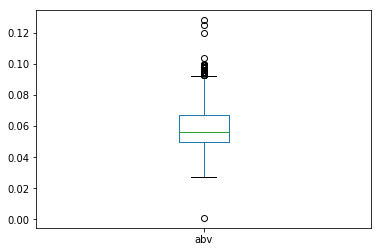

In [75]:
beers_df.boxplot( column =['abv'], grid = False)

In [76]:
beers_df.sort_values(['abv'], ascending = False).head(12)

,abv,ibu,id,name,style,brewery_id,ounces,abv_percent
2278,0.128,NaN,2565,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),51,19.2,12.8
70,0.125,80.0,2685,London Balling,English Barleywine,1,16.0,12.5
2189,0.120,90.0,2621,Csar,Russian Imperial Stout,17,16.0,12.0
2279,0.104,NaN,2564,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,51,19.2,10.4
1857,0.100,52.0,2574,4Beans,Baltic Porter,46,12.0,10.0
1870,0.099,85.0,1020,3Beans,Baltic Porter,46,12.0,9.9
1361,0.099,NaN,2361,Axe Head Malt Liquor,American Malt Liquor,134,24.0,9.9
1586,0.099,98.0,803,Ten Fidy Imperial Stout (2007),Russian Imperial Stout,503,12.0,9.9
1684,0.099,85.0,1861,BLAKKR,American Black Ale,128,12.0,9.9
466,0.099,NaN,29,Very Noddy Lager (Current),Schwarzbier,530,16.0,9.9


We can identify the ABV's with the higher number of craft beers

In [79]:
top_abv = beers_df['abv_percent'].value_counts().head(10)
print(top_abv)

5.0    215
5.5    158
6.0    125
6.5    123
5.2    107
7.0     92
4.5     89
4.8     72
5.8     66
5.6     66
Name: abv_percent, dtype: int64


(array([  0.,   3.,  35., 422., 870., 516., 251., 142., 103.,   2.,   1.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 11 Patch objects>)

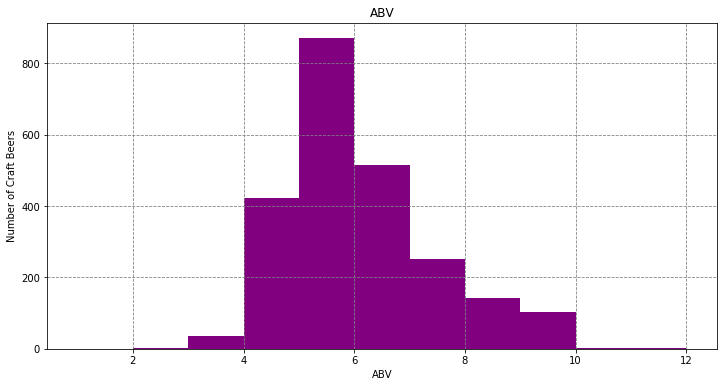

In [95]:
plt.figure(figsize=(12,6))
plt.title('ABV')
plt.xlabel('ABV')
plt.ylabel('Number of Craft Beers')
plt.grid(color='gray', linestyle='dashed')

plt.hist(beers_df['abv_percent'], bins=np.arange(1,13,1), color='purple')

## IBU

In [99]:
beers_df.ibu.describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

In [97]:
top_ibu = beers_df['ibu'].value_counts().head(15)
print(top_ibu)

20.0    82
35.0    60
65.0    54
30.0    53
70.0    48
18.0    46
25.0    45
60.0    44
40.0    41
15.0    40
45.0    39
22.0    35
55.0    31
75.0    31
85.0    30
Name: ibu, dtype: int64


(array([  3.,  37.,  70., 146., 188., 116., 102.,  97.,  88.,  67.,  44.,
         37.,  64.,  85.,  66.,  39.,  30.,  40.,  25.,  12.,  29.,   2.,
          5.,   6.,   3.,   1.,   2.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135]),
 <a list of 27 Patch objects>)

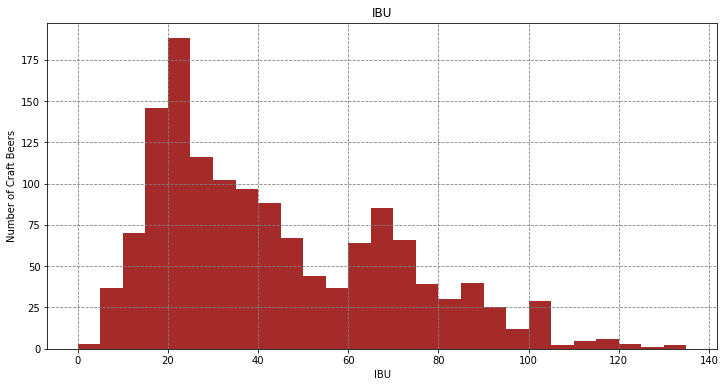

In [108]:
plt.figure(figsize=(12,6))
plt.title('IBU')
plt.xlabel('IBU')
plt.ylabel('Number of Craft Beers')
plt.grid(color='gray', linestyle='dashed')

plt.hist(beers_df['ibu'], bins=np.arange(0,138,5), color='brown')

In [110]:
beers_df.describe()

,abv,ibu,id,brewery_id,ounces,abv_percent
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000,2348.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241,5.977342
std,0.013542,25.954066,752.459975,157.685604,2.352204,1.354173
min,0.001000,4.000000,1.000000,0.000000,8.400000,0.100000
25%,0.050000,21.000000,808.250000,93.000000,12.000000,5.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000,5.600000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000,6.700000
max,0.128000,138.000000,2692.000000,557.000000,32.000000,12.800000


(array([1.000e+00, 1.525e+03, 0.000e+00, 8.420e+02, 1.500e+01, 0.000e+00,
        2.200e+01, 0.000e+00, 0.000e+00, 5.000e+00]),
 array([ 8.4 , 10.76, 13.12, 15.48, 17.84, 20.2 , 22.56, 24.92, 27.28,
        29.64, 32.  ]),
 <a list of 10 Patch objects>)

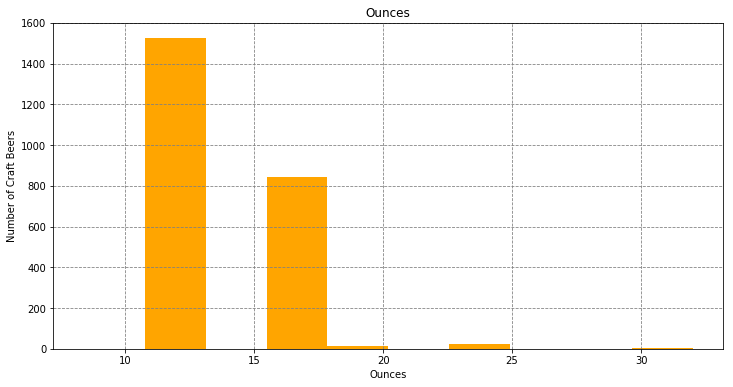

In [119]:
plt.figure(figsize=(12,6))
plt.title('Ounces')
plt.xlabel('Ounces')
plt.ylabel('Number of Craft Beers')
plt.grid(color='gray', linestyle='dashed')

plt.hist(beers_df['ounces'], color='orange')

## Style

In [136]:
style_counts = beers_df['style'].value_counts().head(10)
style_counts

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: style, dtype: int64

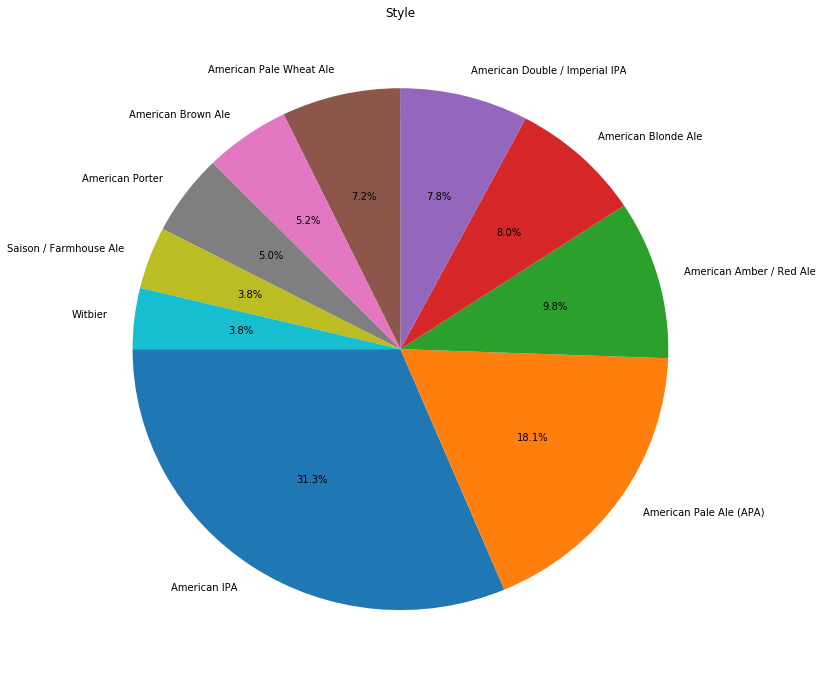

In [137]:
plt.figure(figsize=(12,12))
plt.title('Style')
plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=180);

difficult to visualize as there are so many different types of beer.

Considerations:
* grouping beers into their general type of beer (Ale, Lager, Pilsner), and for what reason? To build recommendations list on where to go for a person's favorite type and what to look at?
* How would I go about categorizing all the beers given their craft beer names?

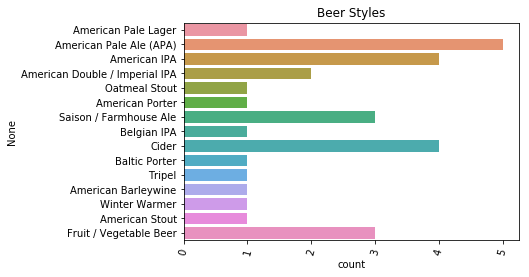

In [157]:
sns.countplot(y=beers_df['style'].head(30))
plt.xticks(rotation=75);
plt.title('Beer Styles')
plt.ylabel(None);

In [142]:
beers_corr_df = beers_df[['abv','ibu','ounces']].copy()
beers_corr_df.head()

,abv,ibu,ounces
0,0.050,NaN,12.0
1,0.066,NaN,12.0
2,0.071,NaN,12.0
3,0.090,NaN,12.0
4,0.075,NaN,12.0


In [143]:
beers_corr_df.corr()

,abv,ibu,ounces
abv,1.000000,0.670621,0.172529
ibu,0.670621,1.000000,0.054691
ounces,0.172529,0.054691,1.000000


Text(0,0.5,'abv')

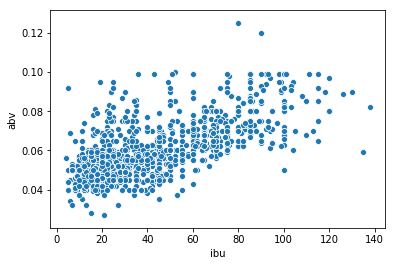

In [168]:
sns.scatterplot(x='ibu', y='abv', data=beers_df)
plt.xlabel('ibu')
plt.ylabel('abv')